In [48]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score


In [5]:
data = pd.read_csv('titanic.csv')

In [6]:
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [9]:
len(data.index)

887

In [11]:
data.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

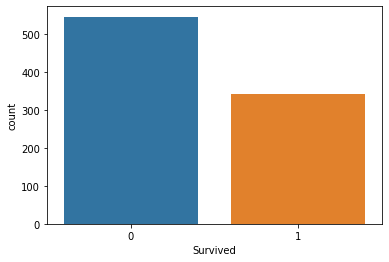

In [16]:
sb.countplot(x='Survived',data=data)

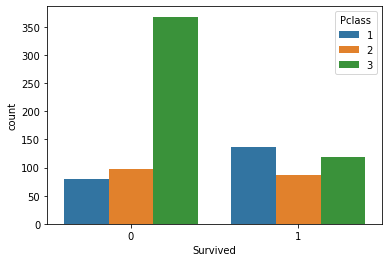

In [21]:
sb.countplot(x='Survived',hue='Pclass',data=data)

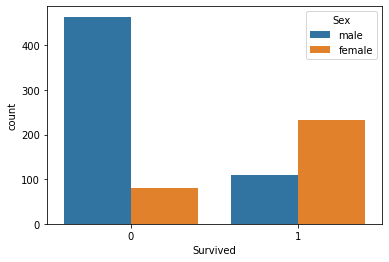

In [22]:
sb.countplot(x='Survived',hue='Sex',data=data)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
Survived                   887 non-null int64
Pclass                     887 non-null int64
Name                       887 non-null object
Sex                        887 non-null object
Age                        887 non-null float64
Siblings/Spouses Aboard    887 non-null int64
Parents/Children Aboard    887 non-null int64
Fare                       887 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [62]:
gender=pd.get_dummies(data['Sex'],drop_first=True)     #converting data to numerical value

In [29]:
pclass= pd.get_dummies(data['Pclass'],drop_first=True)

In [64]:
final_data=pd.concat([data,gender,pclass],axis=1)     #concatenating for final data 

In [34]:
final_data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male,2,3
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,1,0,1
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,0,0,0
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,0,0,1
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,0,0,0
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,1,0,1


In [36]:
final_data.drop(['Pclass','Name','Sex','Fare'],axis=1,inplace=True)

In [37]:
final_data.head()

,Survived,Age,Siblings/Spouses Aboard,Parents/Children Aboard,male,2,3
0,0,22.0,1,0,1,0,1
1,1,38.0,1,0,0,0,0
2,1,26.0,0,0,0,0,1
3,1,35.0,1,0,0,0,0
4,0,35.0,0,0,1,0,1


In [63]:
Y = final_data['Survived']
X = final_data.drop('Survived',axis=1)    #preparing data

In [39]:
X.head()

,Age,Siblings/Spouses Aboard,Parents/Children Aboard,male,2,3
0,22.0,1,0,1,0,1
1,38.0,1,0,0,0,0
2,26.0,0,0,0,0,1
3,35.0,1,0,0,0,0
4,35.0,0,0,1,0,1


In [40]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1,random_state=1)

In [57]:
lr = LogisticRegression()

In [66]:
lr.fit(X_train,Y_train)     #fitting the data

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
predictions = lr.predict(X_test)      #predicting the test data

In [60]:
confusion_matrix

array([[47,  6],
       [11, 25]])

In [65]:
accuracy_score(Y_test,predictions)    #our accuracy score

0.8089887640449438